In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from scipy.stats import contingency

covid = pd.read_csv('Statistik_Notebooks/COVID-19 Survey.csv',\
                         sep=',',encoding='latin-1', index_col=0)
# es dürfen gerne weitere/andere Module benutzt werden

Lade den Datensatz zur Umfrage unter Studierenden bezüglich COVID-19.

**1)** *Datenaufbereitung*: Überprüfe ob es fehlende Einträge im Datensatz gibt. Entferne alle Beoabchtungen, wo mehr als ein Drittel der Merkmale keinen Eintrag haben. Wieviele Beobachtungen und welche Anzahl an Merkmalen hat der Datensatz nach dieser Bearbeitung? [2 Punkte]

In [65]:


#display(covid)

# Display the number of columns (features)
print("Anzahl Spalten (Merkmale):", covid.shape[1])

# Display the number of rows (observations)
print("Anzahl Zeilen (Beobachtungen):", covid.shape[0])

# Number of missing entries per attribute
missing_entries = covid.isnull().sum()

# Remove rows where more than 33% of the values are missing (NaN) / Source: https://www.plus2net.com/python/pandas-dataframe-dropna-thresh.php
data_cleaned = covid.dropna(axis=0, thresh=covid.shape[1] * 0.33)

# Display the number of missing entries per attribute
print("Anzahl der fehlenden Einträge pro Merkmal:", missing_entries)

# Display dataset size before and after cleaning
print("Datensatzgröße vor der Bereinigung:", covid.shape)
print("Datensatzgröße nach der Bereinigung:", data_cleaned.shape)
                                                    

Anzahl Spalten (Merkmale): 0
Anzahl Zeilen (Beobachtungen): 1182
Anzahl der fehlenden Einträge pro Merkmal: Series([], dtype: float64)
Datensatzgröße vor der Bereinigung: (1182, 0)
Datensatzgröße nach der Bereinigung: (1182, 0)


**2)** *Datenuntersuchung*: Welche Merkmale im Datensatz sind nominal und welche Merkmale sind ordinal skaliert? Bestimme anschließend die Modi aller nominalen Merkmale und gib sie in einer übersichtlichen Darstellungen an. Welche findest du überraschend? [4 Punkte]


In [12]:
covid = pd.read_csv('Statistik_Notebooks/COVID-19 Survey.csv',\
                         sep=',',encoding='latin-1', index_col=0)
#display(covid)

nominal_features = ([
    "Region of residence",
    "Medium for online class",
    "Prefered social media platform",
    "Health issue during lockdown",
    "Stress busters",
    "Do you find yourself more connected with your family, close friends , relatives  ?",
    "What you miss the most"
])

print(nominal_features)
#print(covid.columns)

# Create an empty DataFrame to store the results
modus_table = pd.DataFrame(columns=["Merkmal", "Modus"])

print(modus_table)

for merkmal in nominal_features:
    modus = covid[merkmal].mode().iloc[0]
    new_row = {"Merkmal" : merkmal, "Modus": modus}
    modus_table = modus_table._append(new_row, ignore_index=True)
    
display(modus_table)

['Region of residence', 'Medium for online class', 'Prefered social media platform', 'Health issue during lockdown', 'Stress busters', 'Do you find yourself more connected with your family, close friends , relatives  ?', 'What you miss the most']
Empty DataFrame
Columns: [Merkmal, Modus]
Index: []


,Merkmal,Modus
0,Region of residence,Delhi-NCR
1,Medium for online class,Laptop/Desktop
2,Prefered social media platform,Instagram
3,Health issue during lockdown,NO
4,Stress busters,Listening to music
5,Do you find yourself more connected with your ...,YES
6,What you miss the most,School/college


**3)** *Grafische Auswertung*: 
- Stelle für das Merkmal *Medium for online class* die absoluten Häufigkeiten dar.
- Stelle für das Merkmal *Prefered social media platform* die relativen Häufigkeiten dar.
- Stelle für das Merkmal *Rating of Online Class experience* die relativen Häufigkeiten dar. Sortiere dabei die Merkmalsausprägungen nach deiner gewählten Reihenfolge.
- Stelle für das Merkmal *Time spent on Online Class* die kumulative Häufigkeit dar.

Leite aus diesen Darstellungen jeweils eine Erkenntnis pro Darstellung ab. [9 Punkte]

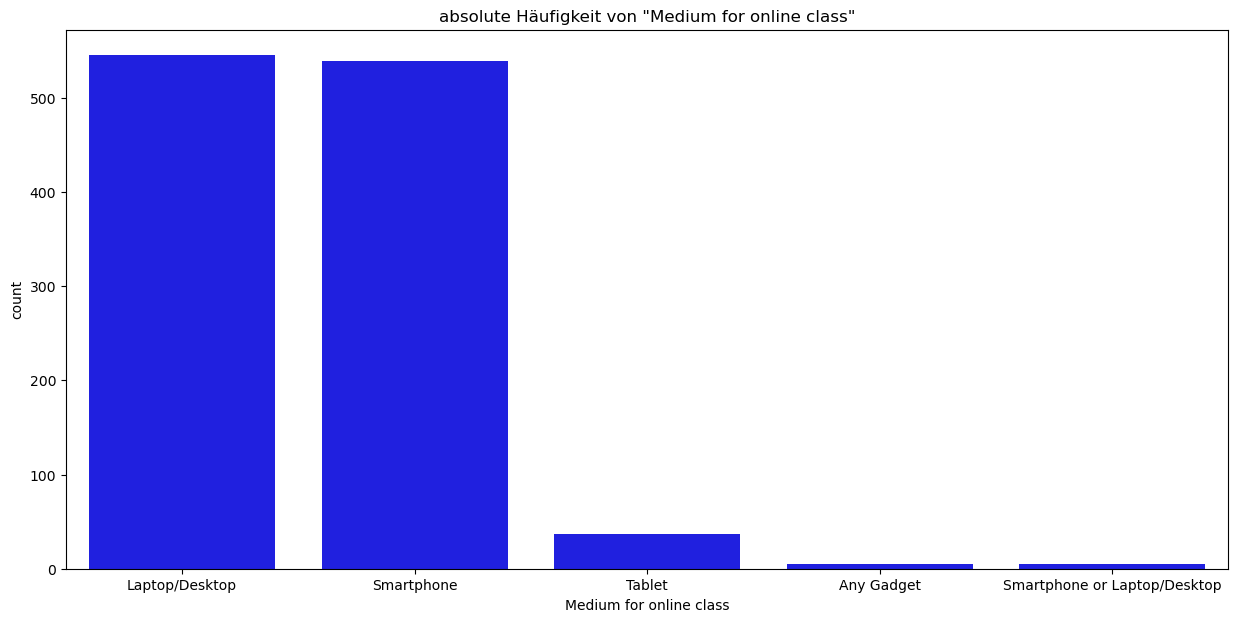

In [63]:
#display(covid)

#fig, axs = plt.subplots(2,1,figsize=(10,9))
plt.figure(figsize =(15, 7))
sea.countplot(data=covid, x='Medium for online class', color='blue')
plt.title('absolute Häufigkeit von "Medium for online class"')
plt.show()

# Erkenntnis: Überraschend ist, dass Smartphones und Laptops bzw. Desktops fast gleichauf liegen.

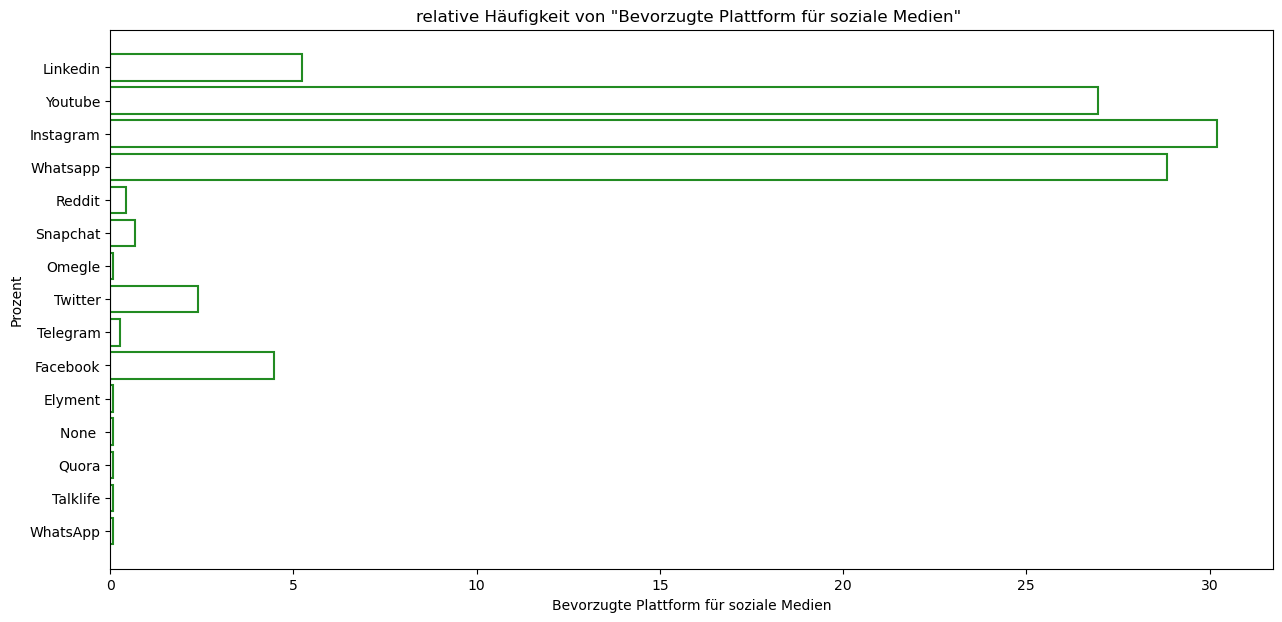

In [7]:
#display(covid)

fig, axs = plt.subplots(figsize =(15, 7))
#sea.countplot(data=covid, x='Prefered social media platform', color='blue')
sea.histplot(data=covid, y='Prefered social media platform', stat='percent', shrink=0.8, \
             discrete=True, fill=False, color='forestgreen')

plt.title('relative Häufigkeit von "Bevorzugte Plattform für soziale Medien" ')
axs.set(xlabel = 'Bevorzugte Plattform für soziale Medien', ylabel='Prozent')
plt.show()

# Erkenntnis: Interessant ist, dass Instagram, Whatsapp und Youtube so dicht beieinander liegen. Dass Facebook so weit hinten liegt, ist vermutlich der Altersgruppe der Befragten geschuldet, die eher jung ist.

,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
ID,,,,,,,,,,,,,,,,,,
R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
R3,Delhi-NCR,20,7.0,NaN,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
R4,Delhi-NCR,20,3.0,NaN,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college


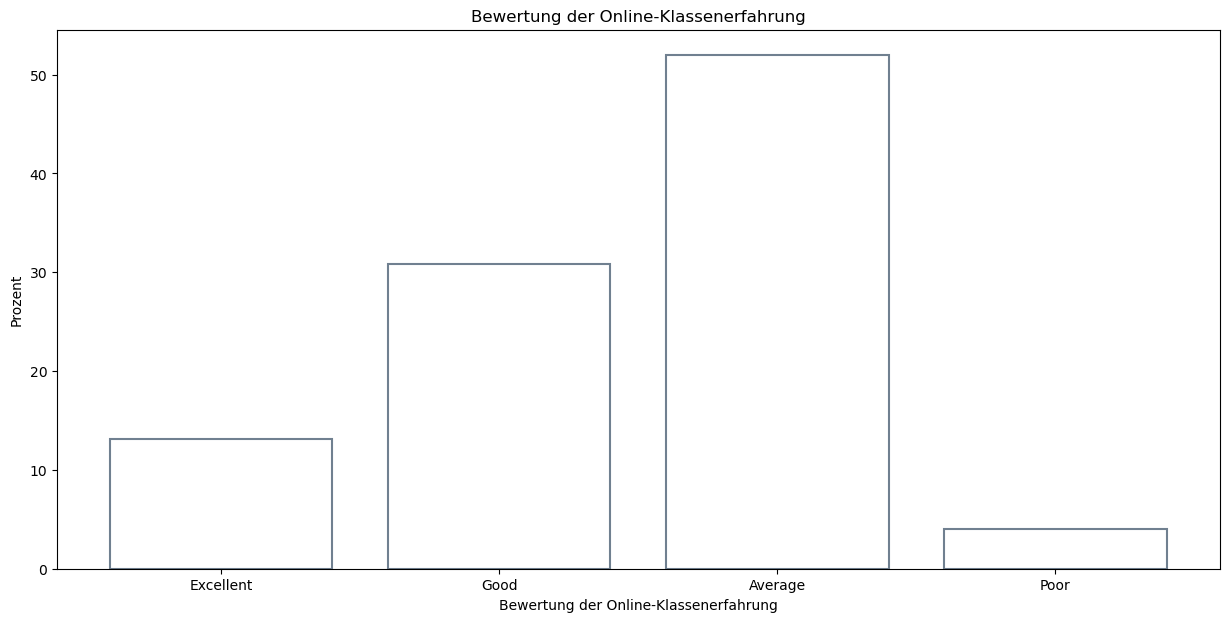

In [5]:
display(covid)

#Reihenfolge
order = ['Excellent', 'Good', 'Average', 'Poor', 'Very Poor']

fig, axs = plt.subplots(figsize=(15,7))

sorted_covid = covid

sorted_covid['Rating of Online Class experience'] = pd.Categorical(sorted_covid['Rating of Online Class experience'], categories=order, ordered=True)
#Sort

sea.histplot(data=sorted_covid, x='Rating of Online Class experience', stat='percent', shrink=0.8, discrete=True, fill=False, color='slategray')

axs.set(xlabel = 'Bewertung der Online-Klassenerfahrung', ylabel='Prozent')
plt.title('Bewertung der Online-Klassenerfahrung')
plt.show()


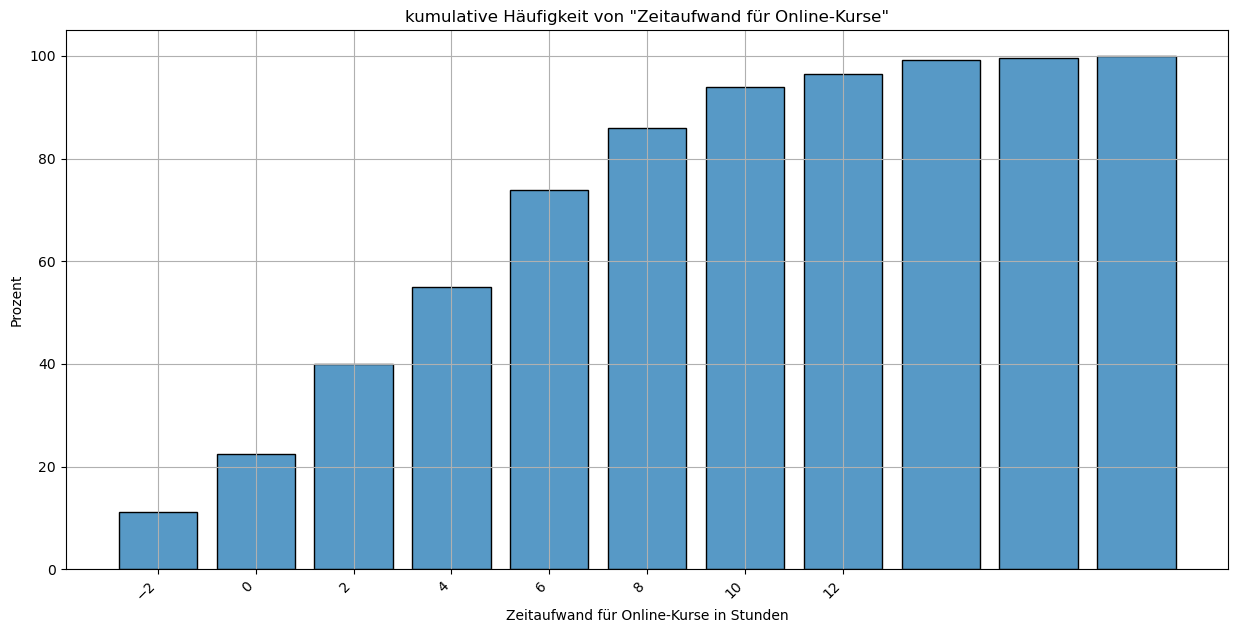

In [18]:

fig, axs = plt.subplots(figsize=(15,7))

sea.histplot( data = covid, x ='Time spent on Online Class', stat='percent', cumulative=True, element='bars', discrete=True, shrink=0.8)
axs.set_title('kumulative Häufigkeit von "Zeitaufwand für Online-Kurse"')
axs.grid()
axs.set(xlabel = 'Zeitaufwand für Online-Kurse in Stunden', ylabel='Prozent')

labels = axs.get_xticklabels()
axs.set_xticks(labels= labels, ticks= np.arange(len(labels)), rotation=45.,horizontalalignment='right')
plt.show()

# Es ist interessant, dass es negative Stunden gibt, dies kann nicht der Realität entsprechen, da man nicht weniger als 0 Stunden Aufwand haben kann.


**4)** *Quantitative Merkmale*: Berechne Mittelwert, Median, Spannweite und Standardbaweichung für die metrischen Merkmale welche mit *Time spent on ..* beginnen. Speicher die Werte in einen neuen Dataframe und lass dir diesen anzeigen. Wie erklären sich die Unterschiede zwischen Mittelwert und Median? Stelle anschließend **in einer Grafik** die Boxplots für alle diese Merkmale dar. Leite mindestens zwei Aussagen aus den Vergleiche der Boxplots ab.

*Hinweis*: Es ist notwendig beim Merkmal *Time spent on TV* die Daten zuerst in eine numerische Form zu transformieren.
[9 Punkte]



,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV
Mittelwert,3.208841,2.911591,0.765821,7.871235,2.365694,1.015678
Median,3.0,2.0,1.0,8.0,2.0,1.0
Spannweite,10.0,18.0,5.0,11.0,10.0,15.0
Standardabweichung,2.101756,2.14059,0.724451,1.615762,1.767336,1.267532


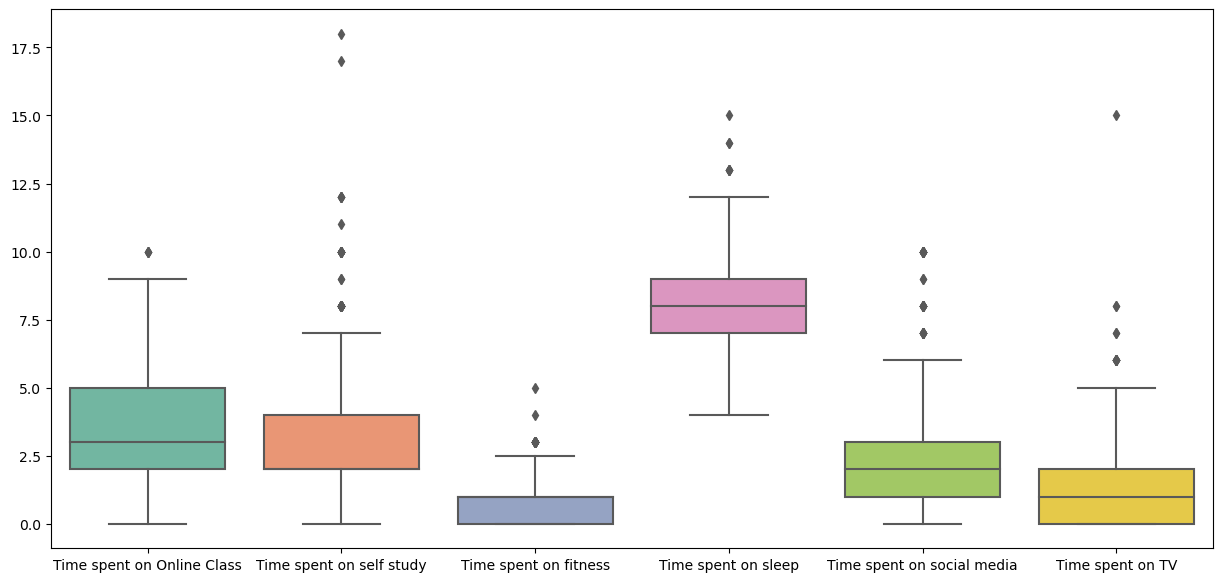

In [45]:
attributes_Time = []

for attribute in df.columns:
    if attribute.startswith('Time spent on'):
        attributes_Time.append(attribute)

#DataFrame with only the 'Time spent on' columns
time_spent_data = covid[attributes_Time]

# Convert the columns to numeric
time_spent_data = time_spent_data.apply(pd.to_numeric, errors='coerce')

#Create a new Dataframe
metric_data = pd.DataFrame(index=['Mittelwert', 'Median', 'Spannweite', 'Standardabweichung'], columns=attributes_Time)

# Calculate the metrics for the numeric columns
for attribute in attributes_Time:
    metric_data.loc['Mittelwert', attribute] = time_spent_data[attribute].mean()
    metric_data.loc['Median', attribute] = time_spent_data[attribute].median()
    metric_data.loc['Spannweite', attribute] = time_spent_data[attribute].max() - time_spent_data[attribute].min()
    metric_data.loc['Standardabweichung', attribute] = time_spent_data[attribute].std()

    
display(metric_data)

fig, axs = plt.subplots(figsize=(15, 7), sharex=True)

sea.boxplot(data=time_spent_data, ax=axs, palette='Set2')

plt.show()


# Unterschied / Differenz zwischen Median und Mittelwert: Die Differenz entsteht durch die Ausreißer, die den Mittelwert verzerren. Der Median ist davon nicht betroffen, da er robust gegenüber Ausreißern ist.
# Erkenntnisse: Es ist erstaunlich zu sehen, dass die Zeit für die Fitness so gering ist gegenüber beispielsweise der Zeit verbracht auf Social Media.
# Interessant ist auch, dass die Spannweite bei 'Time spent on self study' so groß ist, was auf einen großen Unterschied in der aufgewendeten Zeit hinweist.


**5)** *Zusammenhänge Qualitativer Merkmale*: Bestimme die korrigierten Kontingenzkoeffizienten der Zusammenhänge zwischen dem Merkmal *Time utilized* und **allen** anderen nominalen und ordinalen Merkmalen. Stelle die Werte in einer Grafik deiner Wahl dar. Bewerte die Ergebnisse für die Merkmale mit dem niedrigsten und dem höchsten gefundenen Zusammenhang. Bestimme anschließend die folgenden bedingten Häufigkeiten:
- P(Rating of Online class experience = Excellent | Health Issue = No)
- P(Health Issue = No | Rating of Online class experience = Excellent)
[7 Punkte]


,Region of residence,Medium for online class,Health issue during lockdown,Prefered social media platform,Change in your weight,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Age of Subject,Rating of Online Class experience,Stress busters
Korrigierte Kontigenzkoeffizienten,0.02635,0.094811,0.12985,0.138423,0.139589,0.287044,0.315346,0.349367,0.371645,0.418138


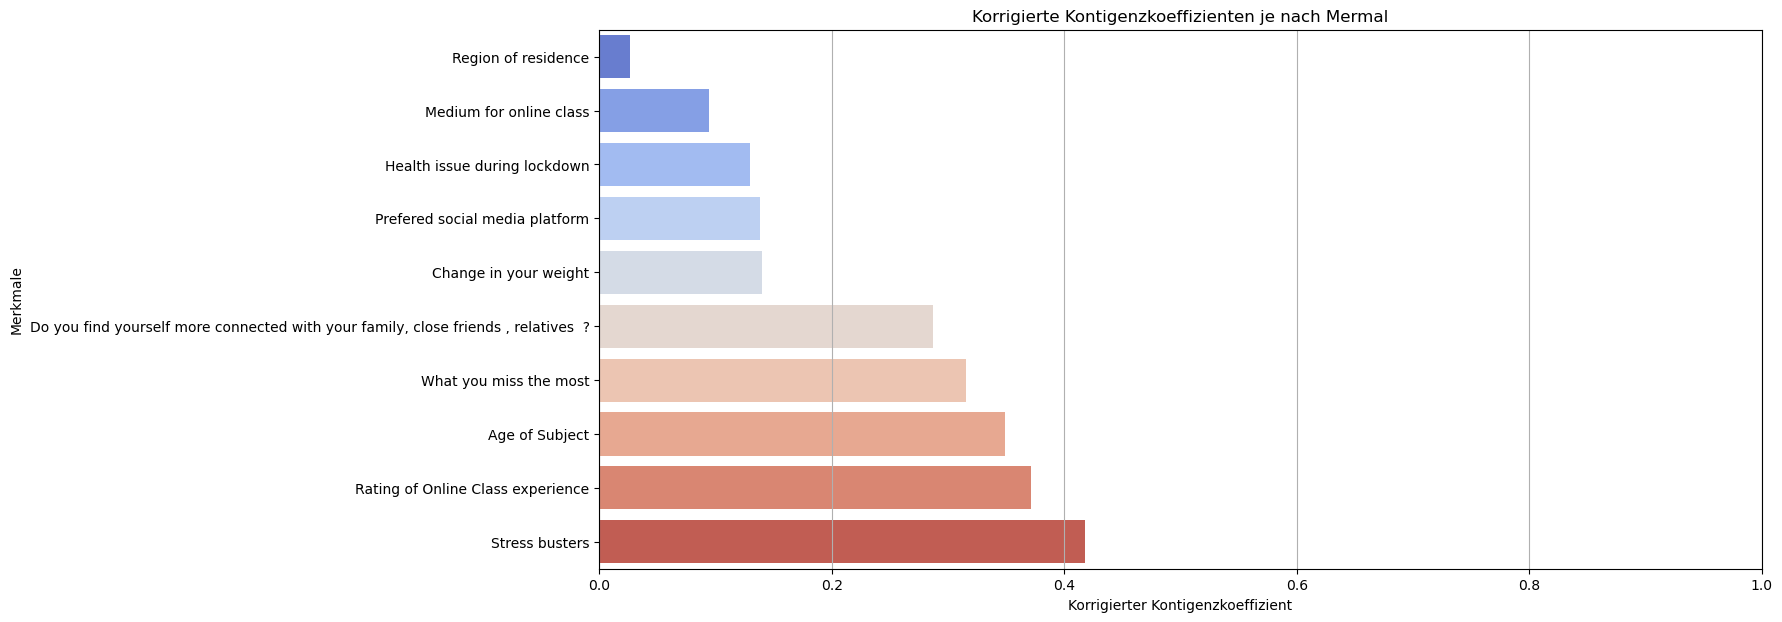

In [34]:
#display(covid)

nominal_att = ['Region of residence',
       'Medium for online class',
       'Prefered social media platform', 
       'Health issue during lockdown', 
        'Stress busters',
        'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most',]

ordinal_att = ['Age of Subject', 'Rating of Online Class experience','Change in your weight']

corrected_contingency_coefficients = ([])

qual_att = nominal_att + ordinal_att

for att in qual_att:
    if att != 'Time utilized':
        ctAbsolut = pd.crosstab(covid['Time utilized'], [covid[att]])
        chi2, pValue, ddof, expFreq = contingency.chi2_contingency(ctAbsolut)
        n = covid.shape[0]
        k = min(ctAbsolut.shape)
        pearson_contingency_coefficient = np.sqrt(chi2 / (n + chi2))
        corrected_contingency_coefficient = (np.sqrt(k / (k-1))) * pearson_contingency_coefficient
        corrected_contingency_coefficients.append({att: corrected_contingency_coefficient})

columns = []
values = []

for item in corrected_contingency_coefficients:
    column_name, value = list(item.keys())[0], list(item.values())[0]
    columns.append(column_name)
    values.append(value)
    
Corrected_Contingency = pd.DataFrame(data=[values], columns=columns, index=['Korrigierte Kontigenzkoeffizienten'])

sorted_Corrected_Contingency = Corrected_Contingency.sort_values(by='Korrigierte Kontigenzkoeffizienten', axis=1, ascending=True)

display(sorted_Corrected_Contingency)

plt.figure(figsize=(15,7))
sea.barplot(data= sorted_Corrected_Contingency, palette='coolwarm', orient='h')
plt.xlabel('Korrigierter Kontigenzkoeffizient')
plt.ylabel('Merkmale')
plt.title('Korrigierte Kontigenzkoeffizienten je nach Mermal')
plt.xlim(0,1)
plt.grid(axis='x')
plt.show()


In [28]:
# Assuming you have already defined qual_att, nominal_att, ordinal_att, and covid DataFrame

corrected_contingency_coefficients = []

for att in qual_att:
    if att != 'Time utilized':
        ctAbsolut = pd.crosstab(covid['Time utilized'], covid[att])
        chi2, pValue, ddof, expFreq = contingency.chi2_contingency(ctAbsolut)
        n = covid.shape[0]
        k = min(ctAbsolut.shape)
        pearson_contingency_coefficient = np.sqrt(chi2 / (n + chi2))
        corrected_contingency_coefficient.append({att: (np.sqrt(k / (k - 1))) * pearson_contingency_coefficient})

# Create a DataFrame from the list of dictionaries
Corrected_Contingency = pd.DataFrame(corrected_contingency_coefficients)

# Display the DataFrame
display(Corrected_Contingency)


AttributeError: 'numpy.float64' object has no attribute 'append'

**6)** *Zusammenhänge Quantitativer Merkmale*: Stelle einen Pairplot für die quantitativen Merkmale dar und berechne die Korrelationskoeffizienten zwischen den Merkmalen. Stelle die Korrelationskoeffizienten ebenfalls übersichtlich dar. Interpretiere anschließend die gefundenen Werte unter Einbezug der entsprechenden grafischen Darstellungen. Welche Zusammenhänge findest du dabei überraschend und bei welchen Zusammenhängen bestätigen sich deine anfänglichen Vermutungen? [7 Punkte]




                            Time spent on Online Class  \
Time spent on Online Class                    1.000000   
Time spent on self study                      0.119318   
Time spent on fitness                        -0.026745   
Time spent on sleep                          -0.177782   
Time spent on social media                   -0.117121   
Time spent on TV                             -0.018818   

                            Time spent on self study  Time spent on fitness  \
Time spent on Online Class                  0.119318              -0.026745   
Time spent on self study                    1.000000               0.022088   
Time spent on fitness                       0.022088               1.000000   
Time spent on sleep                        -0.218573              -0.043975   
Time spent on social media                 -0.162613              -0.042855   
Time spent on TV                           -0.132413               0.011522   

                            Time spent 

C:\Users\Fardin Nayres\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


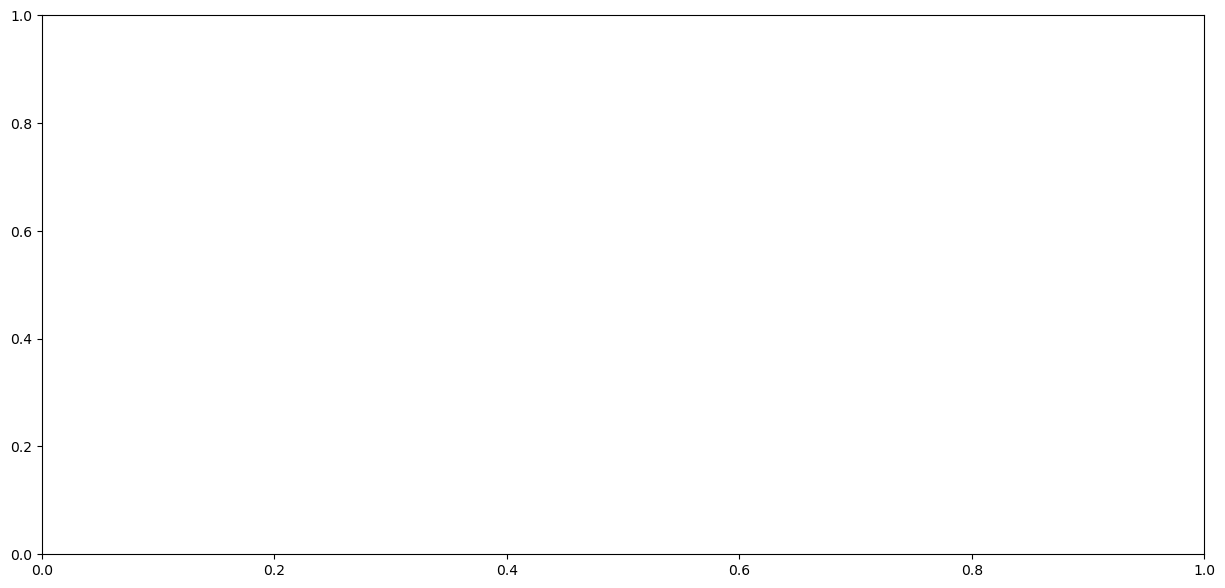

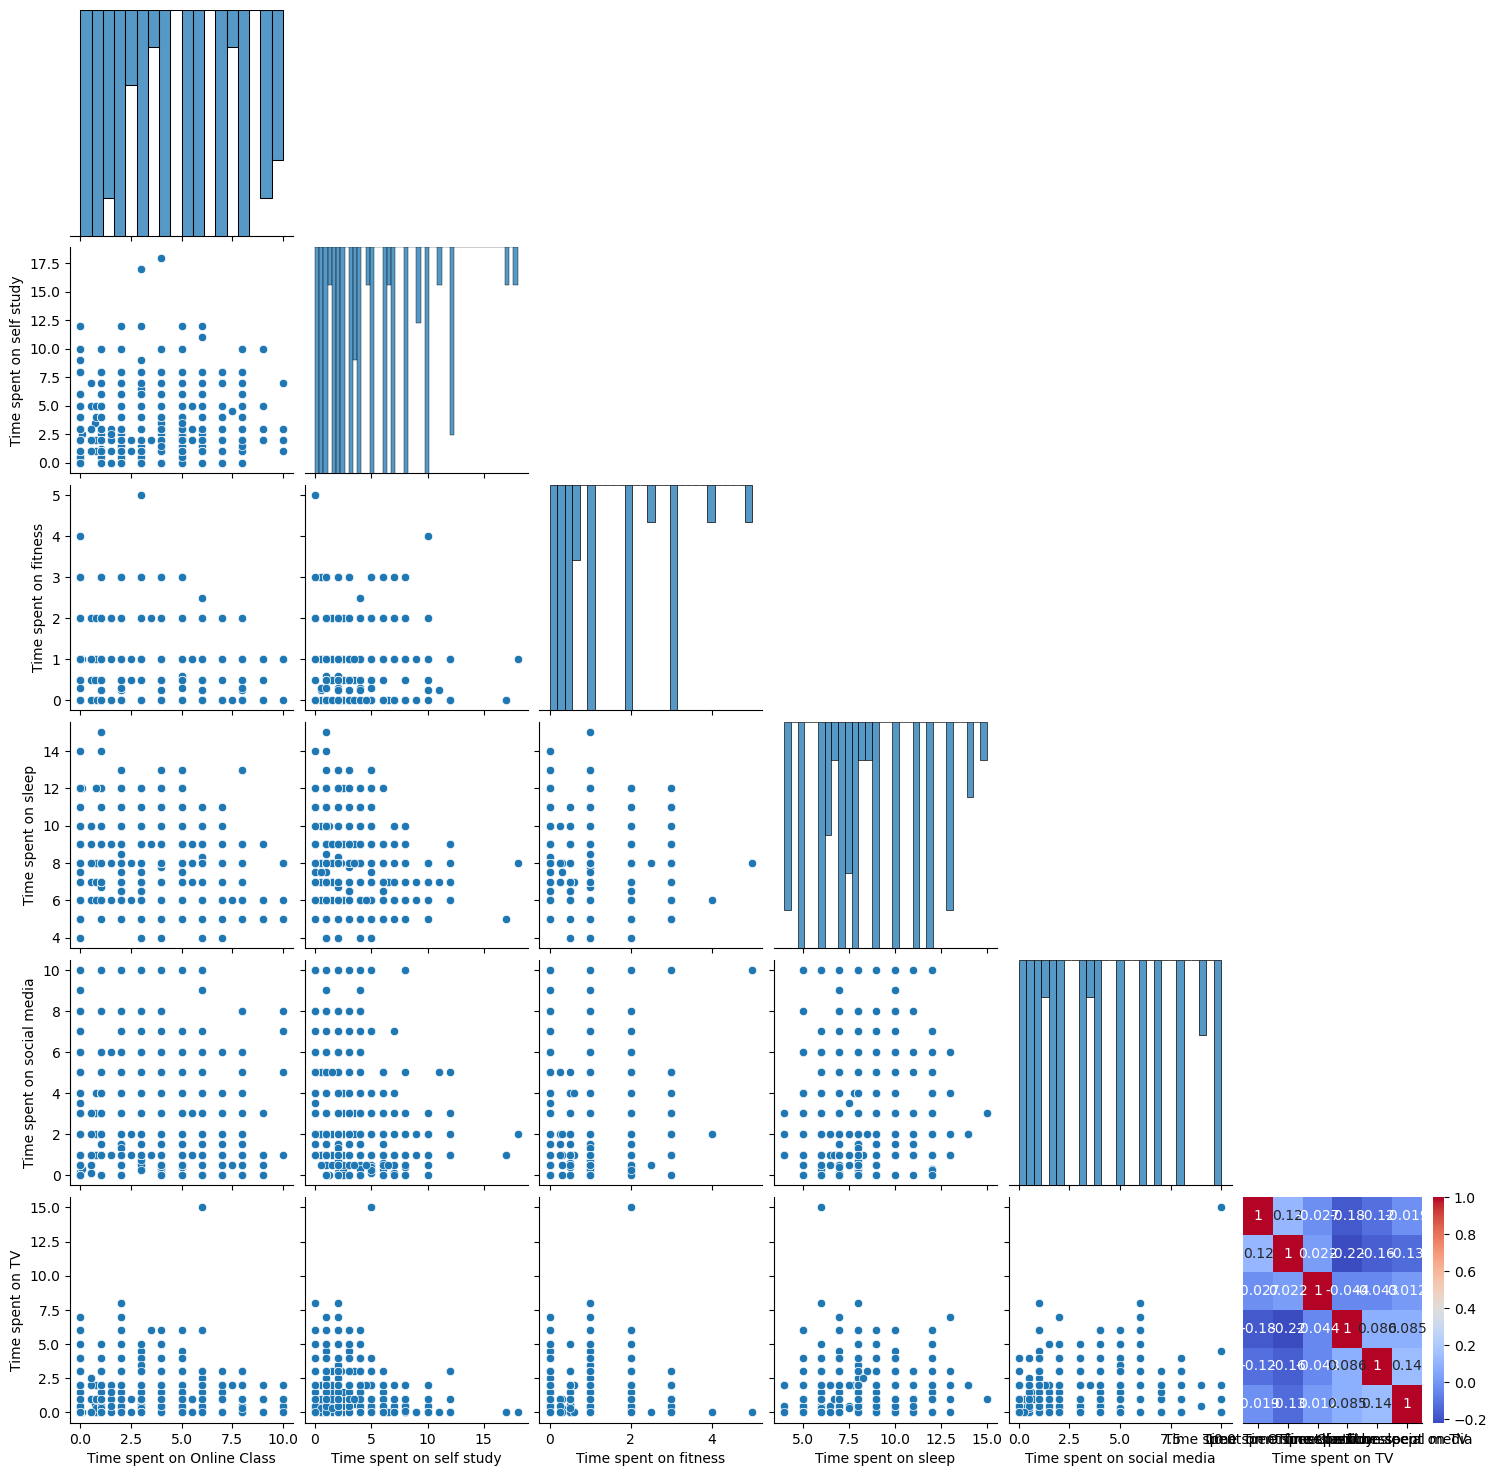

In [57]:
attributes_Time = []

for attribute in df.columns:
    if attribute.startswith('Time spent on'):
        attributes_Time.append(attribute)

#DataFrame with only the 'Time spent on' columns
time_spent_data = covid[attributes_Time]

correlation_matrix = time_spent_data.corr()

print(correlation_matrix)

fig, axs = plt.subplots(figsize=(15, 7), sharex=True)

sea.pairplot(data = time_spent_data, corner=True)
sea.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


**Hinweise**:
- Übersicht der verschiedenen möglichen Farben in matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html
- Bitte beschrifte alle Grafiken an den Achsen und füge wenn nötig eine Legende ein. Achte dabei auf die Lesbarkeit der Elemente.
- Gestalte die Grafiken und das Layout der Grafiken übersichtlich. Also nicht 6 Grafiken untereinander, wenn man diese miteinander vergleichen soll. Zusätzlich muss der Inhalt der Grafiken lesbar sein.